# Experiment 1. Summary.
A high-level overview of progress in experiment 1 so far.

## Purpose
Investigate to what extent popular image classification neural networks can "see" _related colors_.

### Define "see"
Good question! For now, this is limited to testing whether a neural network keeps or loses the sufficient information as it passed through the network. Sufficient information to distinguish relative colors.

## What are related colors?
Our minds create a "color" experience that depends not only on the light from an object, but
also light from surrounding the object. Colors can only be experienced when an object is seen as less bright compared to the surroundings are considered _related colors_.
<div>
    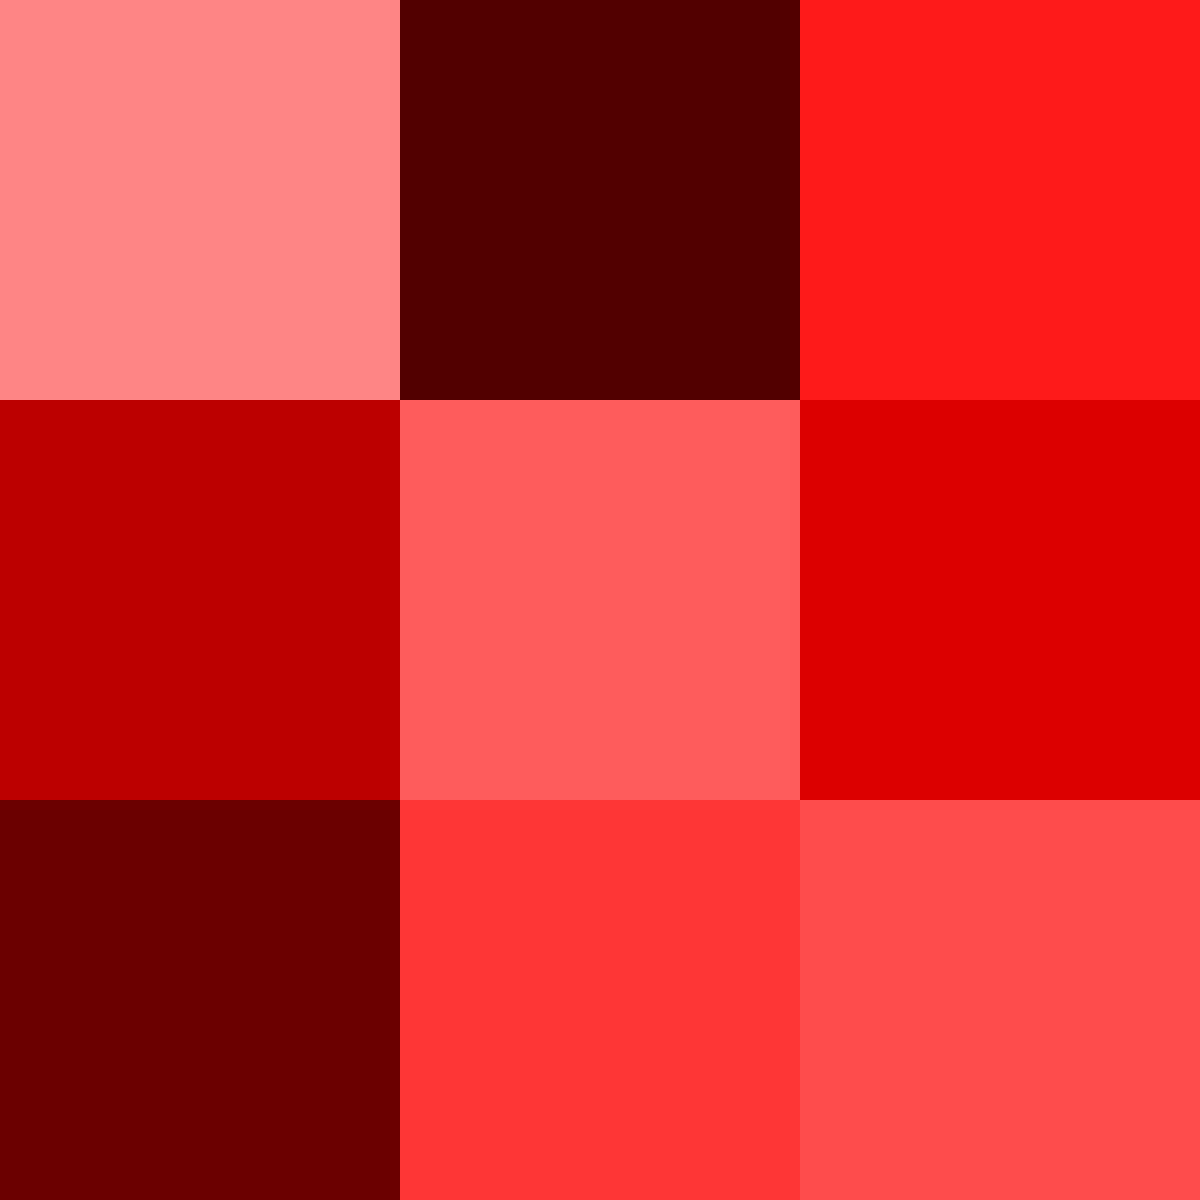
</div>

<div>
    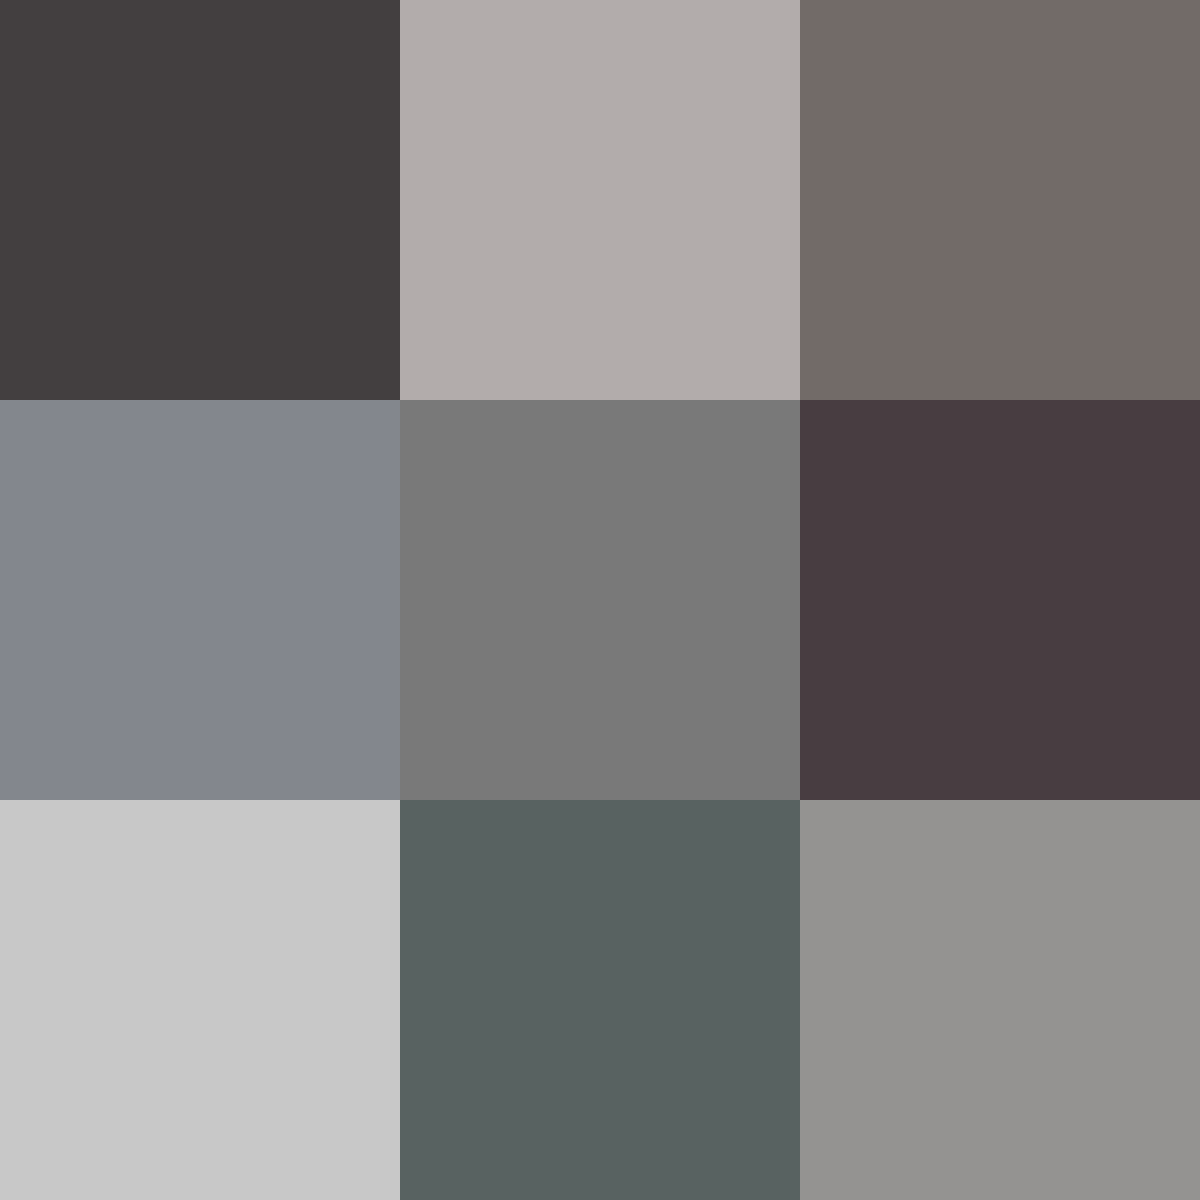
</div>

Some colors cannot be observed as light sources. Why? Light sources appear as the brightest _local_ object, so they always establish themselves as a local maximum brightness. However, there are some color experiences that can only be experienced if the object has a brightness less than the local maximum brightness.


## Dataset
Manually created dataset, from the following setup:
![experiment 1.1.1 setup](resources/experiment_1_1_1.jpg)

## Experiments 1
List of experiments so far.

### Experiment 1.1
Here I collected the data and confirmed that humans (or me, at least) require relative brightness in order to distinguish orange and brown.

The data looks like:

|  Answer  |  Circle Color    |  Background Color      |
| -------- | ---------------- | ---------------------- |
|  0  |  \[0.81, 0.75, 0.28\]   |  \[0.25, 0.25, 0.25\]  |
|  3  |  \[0.12, 0.15, 0.34\]   |  \[0.50, 0.50, 0.50\]     |
|  1  |  \[0.54, 0.23, 0.10\]  |  \[0.91, 0.91, 0.91\]  |
|  2  |  \[0.84, 0.19, 0.29\]   |  \[0.85, 0.85, 0.85\]  |
|  1  |  \[0.87, 0.34, 0.20\]   |  \[0.94, 0.94, 0.94\]  |
|  0  |  \[0.43, 0.43, 0.72\]  |  \[0.31, 0.31, 0.31\]  |

Where elements in the "Answer" represent my choice as follows:

| Answer | Meaning |
| ------ | --------|
| 0| orange   |
|1| brown  |
|2| both  |
|3| neither|  


### Experiment 1.2
I noticed that the Imagenet dataset has 1 pair of classes (lemon, orange) whose classification, if done by humans, would probably rely very heavily on the color. I downloaded a picture of a lemon, photoshopped it to look orange, and asked a pre-trained network to classify it. 

## Lemon to orange
Original lemon image:
<div>
    <img src="resources/lemons/1/lemon_centered_padded.jpg" width="300px"/>
</div>
Edited with orange color:
<div>
    <img src="resources/oranges/1/orange_centered_padded.jpg" width="300px"/>
</div>


#### Results
The pre-trained network rarely (~10%) misclassified the lemon as an orange. This suggests that the network doesn't rely too heavily on color data for this example. 

It's interesting that the neural net classifier doesn't rely heavily on color in a situation where many humans would rely on heavily on color.

### Experiment 1.3
Use data from experiment 1.1 to train a neural network.

In this experiment, a pre-trained ResNet is used, with only the last layer being trainable.

#### 1.3.1 and 1.3.2
Two sub-experiments were done. 

- 1.3.1, allow all parameters to be trained (this was by mistake)
- 1.3.2, fix all parameters except the last layer

#### Result
The network had a high-ish (~85%) classification rate.

### Experiment 1.4
In this experiment, we repeat experiment 1.3, but chop off the end of the network (classification side) to expose 512x7x7 activations. Experiment 1.3 used the standard 512x1x1
activations outputted from ResNet.

#### Result
The network had a low (~70%) classification rate. This is quite poor given that there are only 3 classes from which to classify. Furthermore, one of the classes (neither) is typically quite unrelated to orange or brown, and it's expected that identifying "neither" to be easy. If that's not enough, the "neither" class is the most numerous.

If we ignore the misassignments as neither, then we have about a 75% accuracy for the binary classification task of deciding between orange and brown. Quite poor.
